In [0]:
#for mounting drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np

In [0]:
# Reading cleaned dataset
import pandas as pd
path = '/content/drive/My Drive/BE PROJECT/Lawgical Final/LabelledDataset/'
df = pd.read_csv(path+'cleaned_dataset_new.csv')

In [0]:
# Splitting the dataset into train and test sets
X = df.loc[:,'Judgement'].values
y = df.loc[:,'label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [0]:
# Vectorizinf the corpus using TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,2),max_features=10000) 
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(1192, 10000) (512, 10000)


In [0]:
! pip install -q scikit-plot

In [0]:
from  sklearn.metrics  import accuracy_score
from  sklearn.metrics  import recall_score
from  sklearn.metrics  import precision_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [0]:
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(X, y, features, min_tfidf=0.1, top_n=20):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(15, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_ylabel("Word", labelpad=16, fontsize=14)
        ax.set_title("Class = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

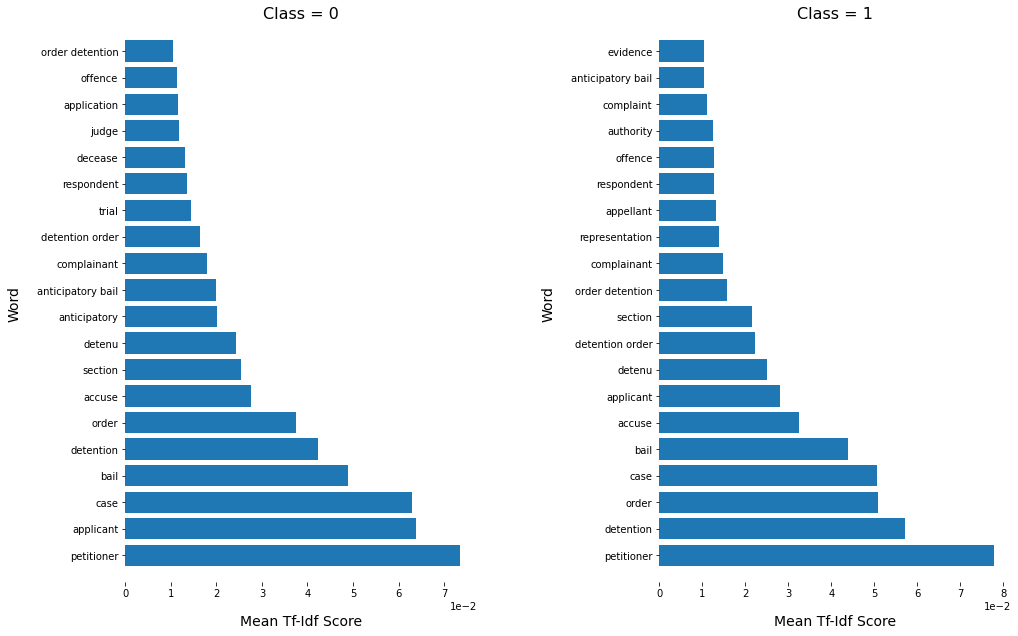

In [0]:
class_features = vectorizer.get_feature_names()
class_top_dfs = top_feats_by_class(train_vectors, y_train, class_features)
plot_tfidf_classfeats_h(class_top_dfs)


In [0]:
#Algorithm : SVM

In [0]:
from sklearn.feature_selection import RFE
#scaling inputvectors using maxabsscaler
from sklearn import preprocessing
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_mabs= max_abs_scaler.fit_transform(train_vectors)
X_test_mabs= max_abs_scaler.transform(test_vectors)

from sklearn.svm import LinearSVC
from  sklearn.metrics  import accuracy_score
svm = LinearSVC(C=3, max_iter=5000)
svm.fit(X_train_mabs, y_train)
predicted = svm.predict(X_test_mabs)
print('SVM')
print(accuracy_score(y_test,predicted))

SVM
0.740234375


In [0]:
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_positive_coefficients, top_negative_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['blue' if c > 0 else 'red' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

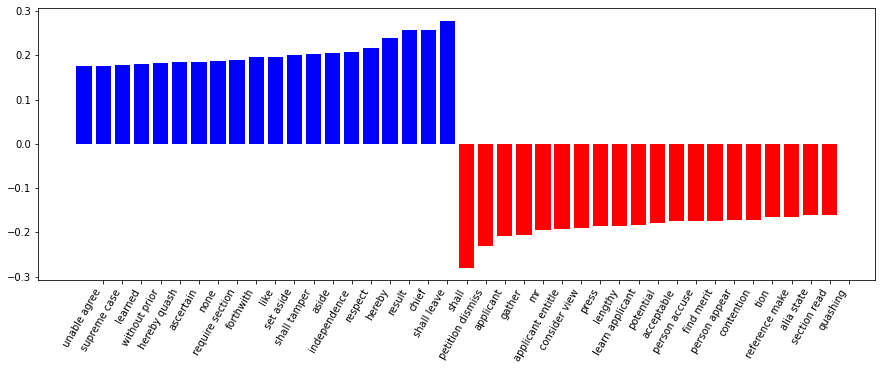

In [0]:
plot_coefficients(svm, vectorizer.get_feature_names())